In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import csv
import numpy as np
from tqdm import tqdm

START = "<start>"
END = "<end>"

sentences = ["A black dog is running after a white dog in the snow", "A dog in a swimming pool swims toward sombody we cannot see"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)

similarity = cosine_similarity([embeddings[0]], [embeddings[1]])

print("Similarity between sentence 1 and sentence 2:", similarity[0][0])

Similarity between sentence 1 and sentence 2: 0.082554124


In [2]:
url_flicker_train = 'flickr_8k_train_dataset.txt';
def flicker_source(fName):
    images = []
    descriptions = []
    with open(fName, encoding='utf-8') as f:
        reader = csv.reader(f, delimiter='\t')
        next(reader) # skip the first row (column headers)
        for row in reader:
            image, texte = row
            images.append(image)
            descriptions.append(texte)
        return images, descriptions

def flicker_train():
    return flicker_source(url_flicker_train)

In [4]:
training_images, training_descriptions = flicker_train()

In [7]:
training_descriptions = np.array(training_descriptions)
print(len(training_descriptions))
rate = 0
indice = 0
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
for i in tqdm(range(len(training_descriptions)), desc="Traitement en cours", unit="s"):
    description = training_descriptions[i].replace(START, '')
    description = description.replace(END, '')
    sentences = ["A person climbing a mountain in the snow.", description]
    embeddings = model.encode(sentences)
    similarity = cosine_similarity([embeddings[0]], [embeddings[1]])
    if similarity > rate:
        print(rate, similarity)
        rate = similarity
        indice = i

print(indice)

30000


Traitement en cours:   0%|          | 14/30000 [00:00<07:08, 69.98s/s]

0 [[0.21773109]]
[[0.21773109]] [[0.24575883]]
[[0.24575883]] [[0.27821553]]
[[0.27821553]] [[0.30747062]]


Traitement en cours:   0%|          | 49/30000 [00:00<03:38, 137.04s/s]

[[0.30747062]] [[0.37301606]]
[[0.37301606]] [[0.52936834]]
[[0.52936834]] [[0.53385854]]


Traitement en cours:   1%|          | 184/30000 [00:01<02:39, 186.70s/s]

[[0.53385854]] [[0.5372923]]


Traitement en cours:   1%|          | 283/30000 [00:01<02:35, 190.87s/s]

[[0.5372923]] [[0.74218416]]
[[0.74218416]] [[0.7952265]]


Traitement en cours:   3%|▎         | 961/30000 [00:05<02:35, 186.75s/s]

[[0.7952265]] [[0.96030617]]


Traitement en cours: 100%|██████████| 30000/30000 [02:38<00:00, 189.34s/s]

927


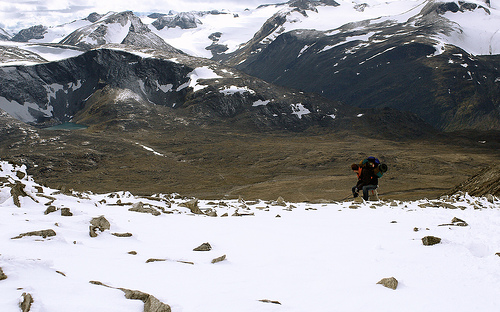

In [8]:
from PIL import Image
DATASET_PATH = 'dataset/Flicker8k_Dataset/'

# Charger l'image
image = Image.open(DATASET_PATH + training_images[indice])

# Afficher l'image
image.show()